# CIFAR-10 image classification project

In [52]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context=ssl._create_unverified_context

# Data

CIFAR10 contains 50000 images 32x32 colour training images,labeled over 10 categories and 10000 test images.

In [53]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [54]:
x_train.shape

(50000, 32, 32, 3)

In [55]:
x_train[0].shape

(32, 32, 3)

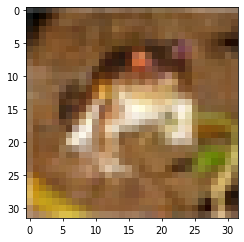

In [56]:
#Looking the images
plt.figure(figsize=(4,4),dpi=70)
plt.imshow(x_train[0]);

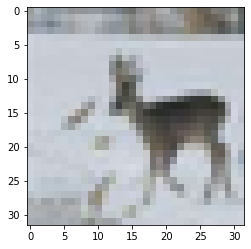

In [57]:
plt.imshow(x_train[20]);

# **PreProcessing**

In [58]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [59]:
x_train[0].shape

(32, 32, 3)

In [60]:
x_train.max()

255

In [61]:
#Normalizing the values
x_train=x_train/255
x_test=x_test/255

In [62]:
x_train.shape

(50000, 32, 32, 3)

In [63]:
from tensorflow.keras.utils import to_categorical #As images are multicoloured 
y_cat_train=to_categorical(y_train,10)

In [64]:
y_cat_train.shape

(50000, 10)

In [65]:
y_cat_test=to_categorical(y_test,10)

# Building the model


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.layers.core import Dense,Dropout,Activation
from keras.layers.normalization.batch_normalization import BatchNormalization
from tensorflow.keras import regularizers

In [67]:
model=Sequential()

In [68]:
# FIRST SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))


In [69]:
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

In [70]:
from keras.layers.core import Dropout
model.add(Dropout(0.2))

In [71]:
## SECOND SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 64, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)))

In [72]:
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

In [73]:
model.add(Dropout(0.2))

In [74]:
#Flattening the images from 28x28 to 784 before final connected layer
model.add(Flatten())

In [75]:
#256 neuron in the dense layers
model.add(Dense(256,activation='relu'))

In [76]:
#Last Layer is the classifier thus 10 possible classes
model.add(Dense(10,activation='softmax'))

In [77]:
model.compile(loss='categorical_crossentropy',

              optimizer='rmsprop',

              metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 64)         

In [98]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation
#Reshaping the images so that we can use same images for model validation rather than taking images from the training or test set.
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [102]:

# We can then feed our augmented data in batches
#Besides loss function consideration as before
# this method actually results in significant memory savings
#because we are actually loading the data into the networks in batces


train_generator=gen.flow(x_train, y_cat_train)
test_generator=test_gen.flow(x_test,y_cat_test)

In [103]:
from tensorflow.keras.callbacks import EarlyStopping 

In [104]:
early_stop = EarlyStopping(monitor = 'val_loss',patience=3) #earlystopping of the epoch when the cross validation loss increases thrice at a time.

In [105]:
model.fit_generator(train_generator, epochs = 10, 
          validation_data = (test_generator), 
          callbacks = [early_stop])

Epoch 1/10
   4/1563 [..............................] - ETA: 29s - loss: 0.9998 - accuracy: 0.6719

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


1563/1563 [==============================] - 32s 20ms/step - loss: 1.0784 - accuracy: 0.6605 - val_loss: 0.9752 - val_accuracy: 0.7066
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0844 - accuracy: 0.6617 - val_loss: 0.9904 - val_accuracy: 0.6975
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0930 - accuracy: 0.6600 - val_loss: 0.9999 - val_accuracy: 0.6899
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0914 - accuracy: 0.6607 - val_loss: 1.0376 - val_accuracy: 0.6787


In [82]:
model.save('cifar_5_epochs.h5') # saving the model

In [83]:
losses = pd.DataFrame(model.history.history) #making dataframe of model's history

In [84]:
losses[['accuracy','val_accuracy']]

,accuracy,val_accuracy
0,0.42818,0.4160
1,0.54418,0.5840
2,0.58260,0.5686
3,0.61048,0.6141
4,0.63164,0.6180
5,0.64876,0.6344
6,0.66428,0.6709
7,0.67662,0.6685
8,0.68512,0.6610
9,0.69544,0.6528


In [85]:
model.metrics_names

['loss', 'accuracy']

In [86]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1699676513671875, 0.6528000235557556]


In [87]:
losses[['accuracy','val_accuracy']].plot;

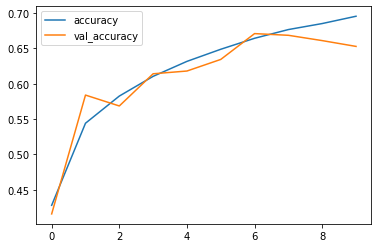

In [88]:
losses[['accuracy','val_accuracy']].plot();

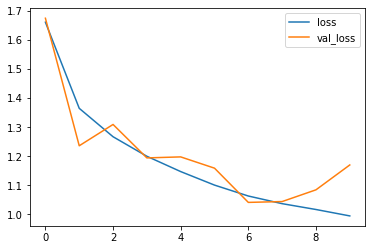

In [89]:
losses[['loss','val_loss']].plot()

In [90]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [91]:
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68      1000
           1       0.69      0.83      0.75      1000
           2       0.75      0.41      0.53      1000
           3       0.61      0.33      0.43      1000
           4       0.74      0.54      0.62      1000
           5       0.60      0.56      0.58      1000
           6       0.71      0.79      0.75      1000
           7       0.65      0.78      0.71      1000
           8       0.83      0.60      0.69      1000
           9       0.55      0.87      0.67      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.64     10000
weighted avg       0.67      0.65      0.64     10000



In [92]:
confusion_matrix(y_test,predict_classes)

array([[821,  44,  12,   4,   7,   6,   4,  13,  27,  62],
       [ 19, 831,   0,   1,   0,   1,   8,   1,   6, 133],
       [130,  35, 413,  39,  67,  84,  96,  59,  22,  55],
       [ 69,  52,  30, 327,  43, 175,  91,  75,  29, 109],
       [ 63,  24,  35,  30, 539,  46,  70, 143,   7,  43],
       [ 34,  21,  28,  86,  30, 562,  45, 102,  16,  76],
       [ 25,  15,  19,  26,  22,  16, 792,  12,   4,  69],
       [ 38,  13,   9,  14,  21,  38,   9, 775,   3,  80],
       [183, 101,   4,   5,   1,   3,   2,   5, 596, 100],
       [ 33,  71,   2,   2,   1,   3,   1,   6,   9, 872]])

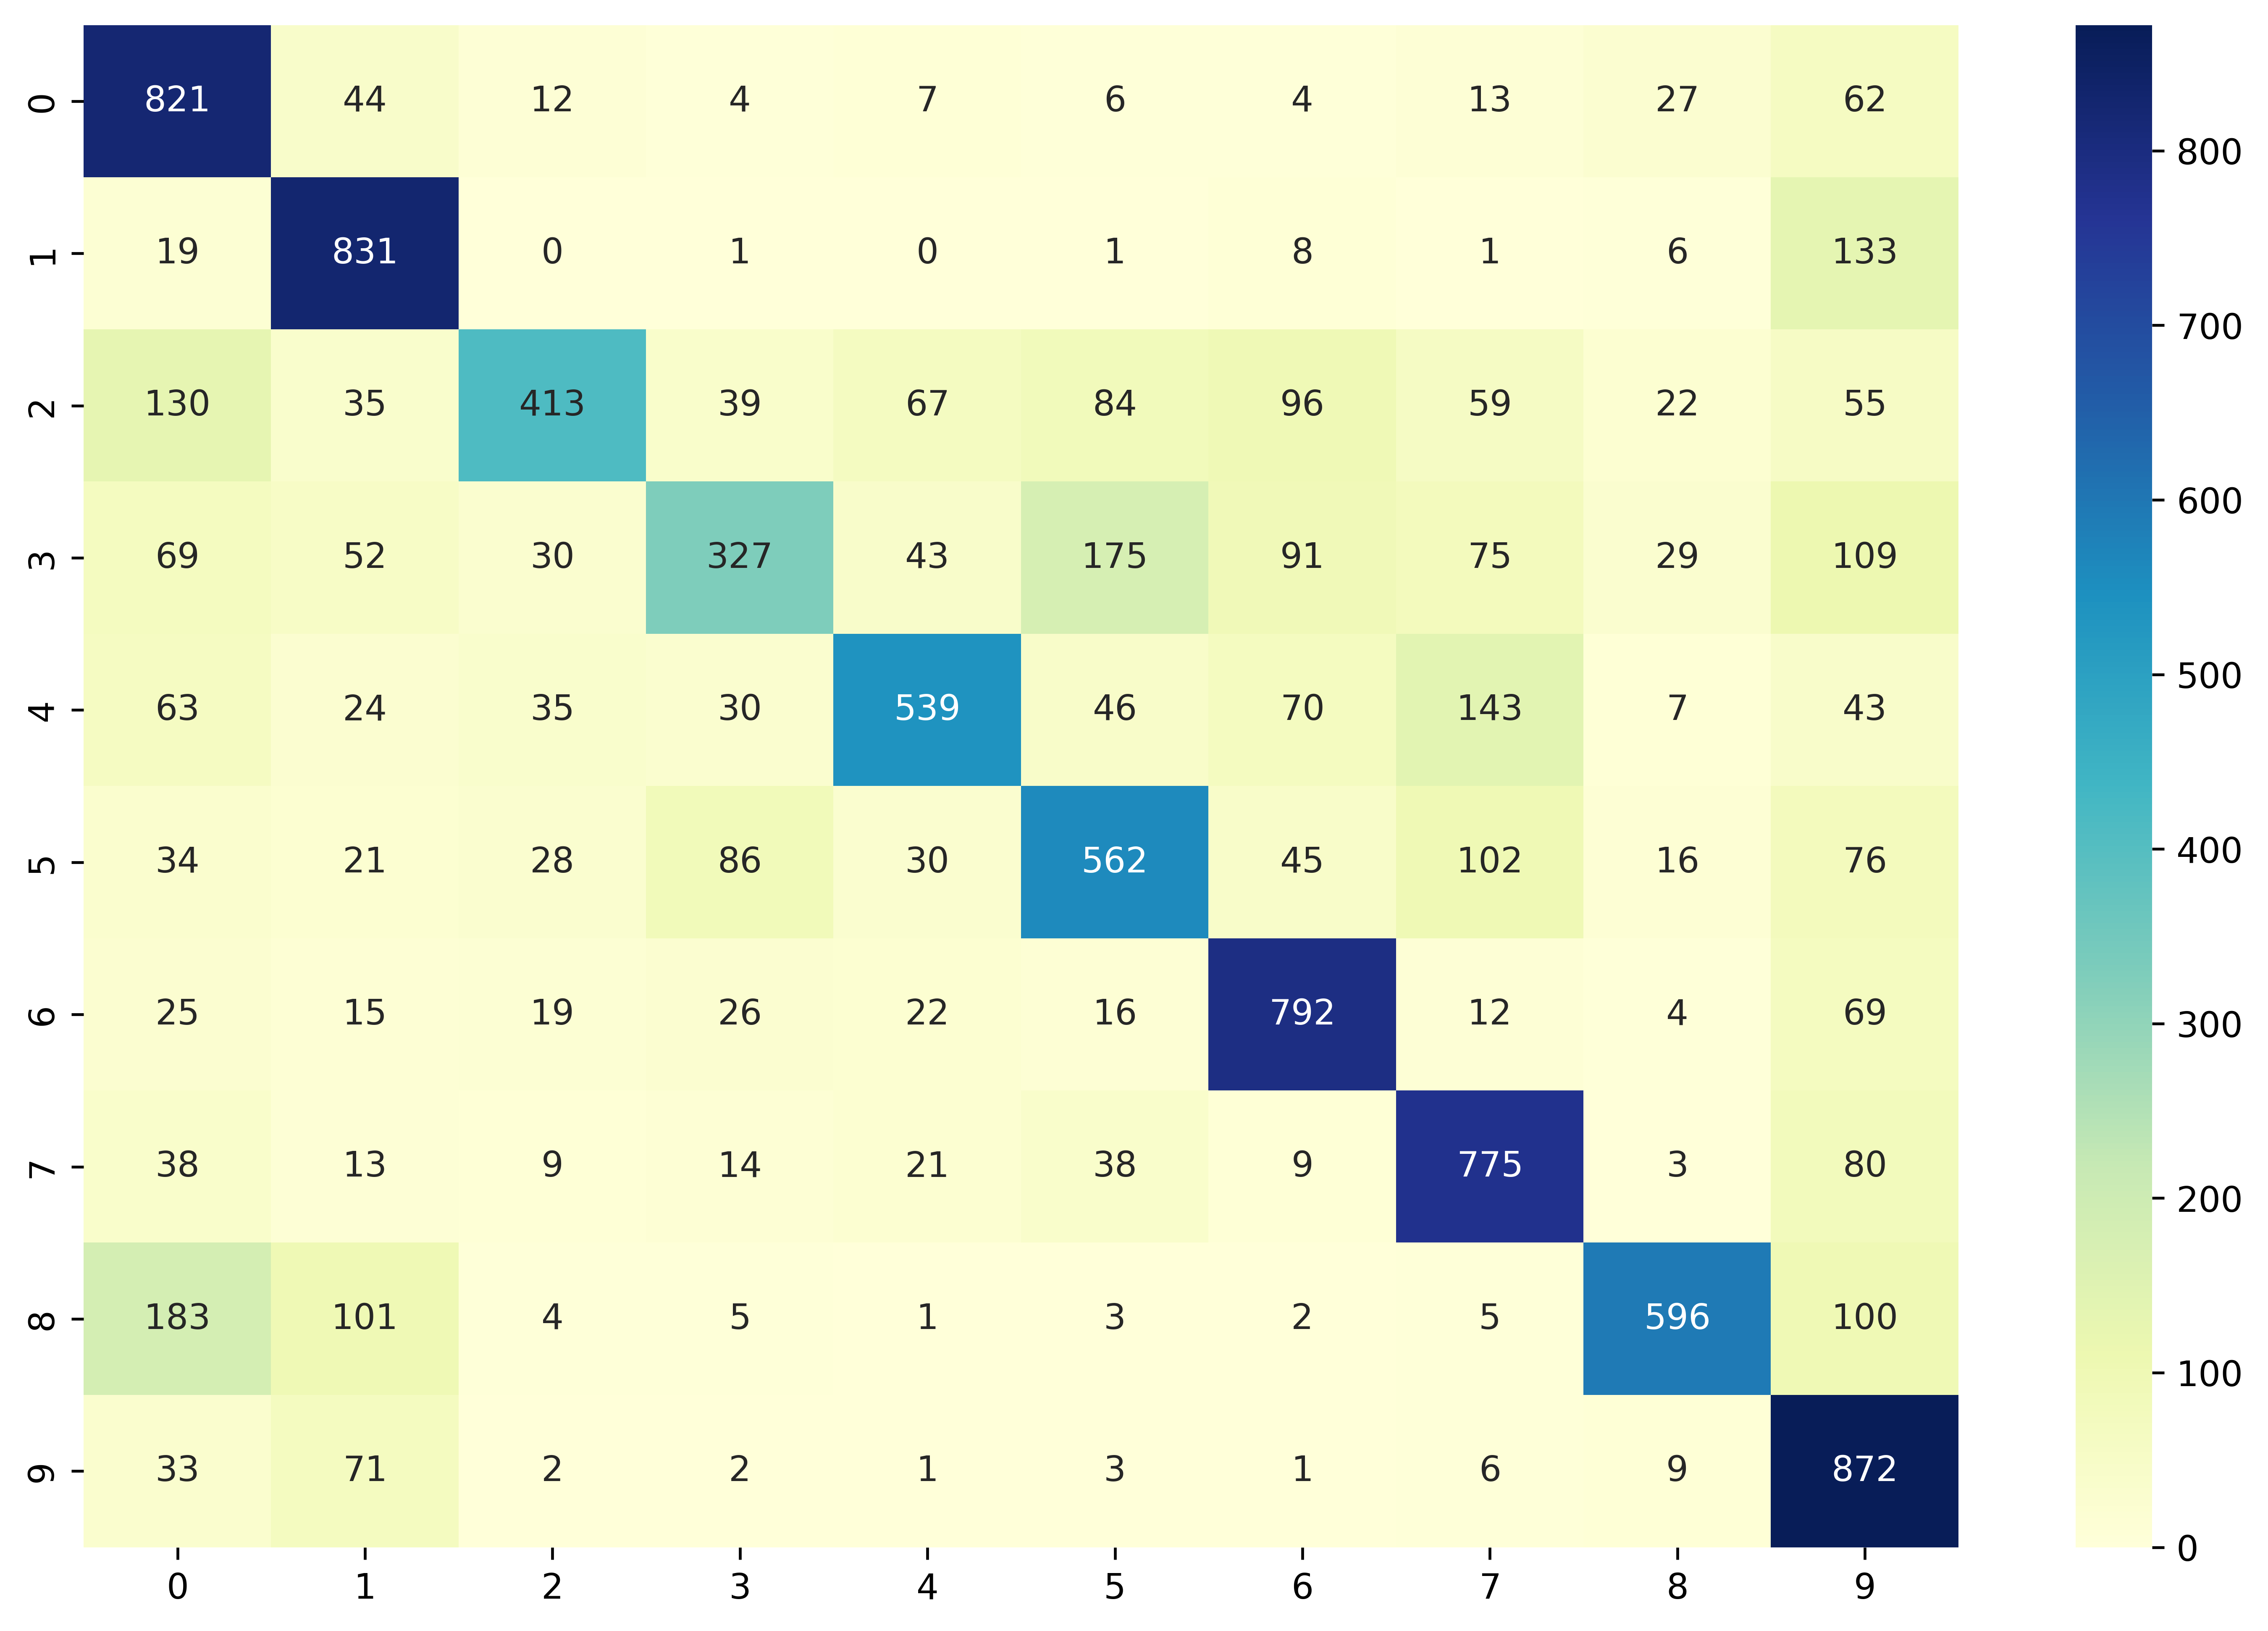

In [93]:
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

Predicting a given image 

In [94]:
my_image = x_test[10]

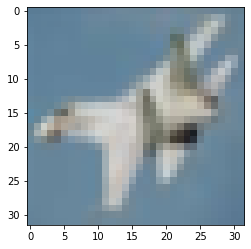

In [95]:

plt.imshow(my_image);



In [96]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 29ms/step


array([[0.528535, 0.001169, 0.026134, 0.033165, 0.328445, 0.020911,
        0.006603, 0.010760, 0.041422, 0.002858]], dtype=float32)